In [1]:
fimport sys
print(sys.version)

SyntaxError: invalid syntax (849983840.py, line 1)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import os
import csv
import random

import cv2
import imutils

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [15]:
folder = '../../Dane/Baza_aktorzy_przerobiona/'
folder_docelowy = '../../Dane/Baza_aktorzy_zlaczone/'
slesh = '/'
png = '.png'
csv = 'aktorzy.csv'

In [4]:
people = []
for i in range(1,7):
    images = []
    for j in range(19):
        im = Image.open(folder+str(i)+slesh+str(j)+png)
        arr_im = np.array(im) 
        images.append(arr_im) 
    people.append(images)

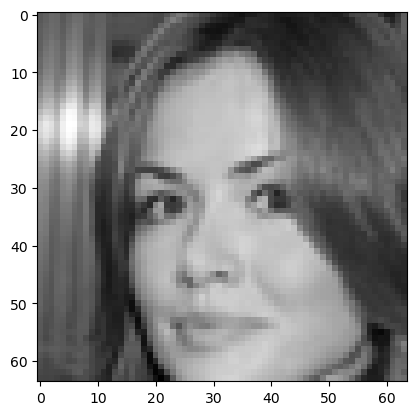

In [5]:
plt.imshow(people[0][4], cmap = 'gray')

In [6]:
#Laczna ilosc zdjec
lacznie = 2052

ilosc = 6
rozmiar = 19
poloczone = []
n = 0

# Inicjalizacja tablicy zerami o rozmiarze 'rozmiar'
tab = np.zeros(lacznie, dtype=np.uint8)


#Stworzenie nowego katalogu
newpath = folder_docelowy
if not os.path.exists(newpath):
    os.makedirs(newpath)

#Petla przechodzi po ludziach
for i in range(ilosc):
    #Petla przechodzi po zdjeciach
    m = rozmiar
    
    for j in range(rozmiar):       
        m = m - 1
        
        for k in range(m):
            con = np.concatenate((people[i][j], people[i][rozmiar-1-k]), axis=1)
    
            #Zapisanie zmienionego zdjecia
            con = Image.fromarray(con)
            con.save(folder_docelowy+str(n)+png) 
      
            poloczone.append(con)
            tab[n] = 1
            n = n + 1

In [7]:
print(len(poloczone))
print(len(people))

1026
6


In [8]:
#Algorytm do tworzenia negatywnych próbek
#licznik
x = 0

rozne = []

for i in range(len(people[0])):
    
    for j in range(1,len(people)):   
        
         for k in range(len(people[0])):
    
            #Laczenie zdjec    
            con = np.concatenate((people[0][i], people[j][k]), axis=1)
    
            con = Image.fromarray(con)
    
            #Dodanie polaczonego zdjecia do tablicy
            rozne.append(con)
            x = x+1
    


 

In [9]:
for i in range(lacznie - n):
    
    rand_1 = random.randint(0,x-1)
    
    con = rozne[rand_1]
    
    #Zapisanie zdjecia
    con.save(folder_docelowy+str(n)+png) 
    
    #Dodanie polaczonego zdjecia do tablicy
    poloczone.append(con)
    
    #Etykieta wykorzystywana do nauki sieci
    tab[n] = 0
    n = n + 1
 

In [16]:
#Zapis tablicy do pliku CSV
tab.tofile(folder_docelowy+csv, sep = ' ')   

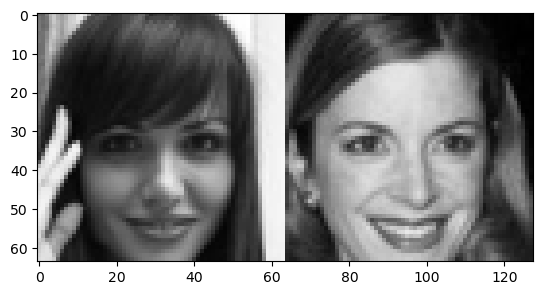

In [14]:
plt.imshow(poloczone[1200], cmap = 'gray')